In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-whitegrid')

# ETL

## Crop Data

In [72]:
df=pd.read_csv('/Users/ruhidmirzayev/Jupyther Notebooks/Palette/Data/RuralMunicipality/rm_crop_yields_1938_2021.csv')

In [5]:
df.head(2)

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN


In [7]:
df.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

In [73]:
cols_crop = ['WinterWheat', 'Canola', 'SpringWheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'FallRye',
       'CanarySeed', 'SpringRye', 'TameHay', 'Flax', 'Chickpeas']

In [74]:
df=df.rename(columns={

    'Winter Wheat': 'WinterWheat',
    'Spring Wheat':'SpringWheat',
    'Fall Rye': 'FallRye',
    'Canary Seed':'CanarySeed',
    'Spring Rye': 'SpringRye',
    'Tame Hay': 'TameHay'
})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25017 non-null  int64  
 1   RM           25017 non-null  int64  
 2   WinterWheat  3037 non-null   float64
 3   Canola       14008 non-null  float64
 4   SpringWheat  24924 non-null  float64
 5   Mustard      4487 non-null   float64
 6   Durum        11581 non-null  float64
 7   Sunflowers   946 non-null    float64
 8   Oats         23913 non-null  float64
 9   Lentils      5515 non-null   float64
 10  Peas         8134 non-null   float64
 11  Barley       24703 non-null  float64
 12  FallRye      15847 non-null  float64
 13  CanarySeed   3819 non-null   float64
 14  SpringRye    805 non-null    float64
 15  TamHay       4205 non-null   float64
 16  Flax         20934 non-null  float64
 17  Chickpeas    960 non-null    float64
dtypes: float64(16), int64(2)
memory usage: 3.4 MB


In [16]:
# We need to change RM int64 to string as it is ID variable
df.RM.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  17,
        18,  19,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,
        43,  44,  45,  46,  49,  51,  61,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 171, 181, 183, 184, 185, 186,
       187, 189, 190, 191, 193, 194, 211, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232,
       241, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255,
       256, 257, 259, 260, 261, 271, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 290, 292, 30

In [18]:
df['RM']=df['RM'].astype('string')


<class 'pandas.core.series.Series'>


In [19]:
df['RM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25017 entries, 0 to 25016
Series name: RM
Non-Null Count  Dtype 
--------------  ----- 
25017 non-null  string
dtypes: string(1)
memory usage: 195.6 KB


## Missing Values

In [28]:
df.isna().sum()

Year               0
RM                 0
WinterWheat    21980
Canola         11009
SpringWheat       93
Mustard        20530
Durum          13436
Sunflowers     24071
Oats            1104
Lentils        19502
Peas           16883
Barley           314
FallRye         9170
CanarySeed     21198
SpringRye      24212
TamHay         20812
Flax            4083
Chickpeas      24057
dtype: int64

In [46]:
missing_values = dict(df.isna().sum())
column_names = list(missing_values.keys())
missing_counts = list(missing_values.values())

df_missing = pd.DataFrame({'Column': column_names, 'Missing Values': missing_counts}).set_index('Column')

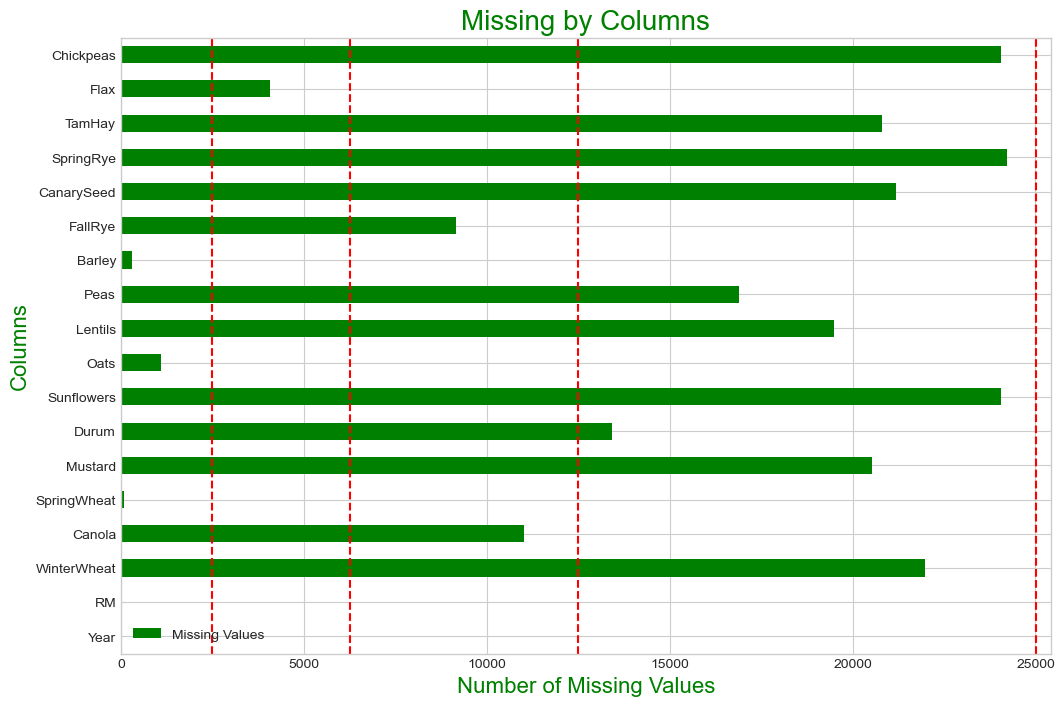

In [62]:
df_missing.plot(kind='barh', color='green')
plt.title('Missing by Columns',size=20, color='green')
plt.xlabel('Number of Missing Values', size=16, color='green')
plt.ylabel('Columns', size=16, color='green')
plt.axvline(len(df), linestyle='--', color='red')
plt.axvline(len(df)/2, linestyle='--', color='red')
plt.axvline(len(df)*0.25, linestyle='--', color='red')
plt.axvline(len(df)*0.10, linestyle='--', color='red')
plt.show()

## GIS Data

In [3]:
gdf=gpd.read_file('/Users/ruhidmirzayev/Jupyther Notebooks/Palette/Data/RuralMunicipality/RuralMunicipality.shp')

In [6]:
gdf.head(2)

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,0101000095,2019-01-21,None,RMPPID,095,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,0101000378,2019-07-29,None,RMPPID,378,ROSEMOUNT,5.844701e+08,161271.937167,"POLYGON ((265258.740 5810148.180, 266062.740 5..."


In [11]:
gdf = gdf[['RMNO', 'geometry']]

In [13]:
gdf=gdf.rename(columns={'RMNO':'RM'})

In [20]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RM        298 non-null    object  
 1   geometry  298 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.8+ KB


In [21]:
gdf.RM.unique()

array(['095', '378', '288', '106', '132', '335', '108', '367', '228',
       '107', '043', '009', '010', '075', '105', '074', '467', '303',
       '426', '318', '077', '310', '171', '245', '046', '012', '070',
       '333', '337', '194', '044', '007', '135', '280', '001', '292',
       '225', '458', '103', '226', '092', '216', '133', '231', '141',
       '008', '250', '104', '252', '110', '125', '162', '193', '305',
       '076', '169', '336', '366', '470', '101', '078', '304', '142',
       '349', '011', '224', '128', '131', '134', '109', '098', '274',
       '003', '004', '031', '040', '037', '111', '405', '160', '038',
       '379', '371', '094', '185', '126', '164', '123', '124', '079',
       '317', '222', '122', '165', '100', '067', '068', '320', '287',
       '395', '406', '401', '032', '259', '308', '370', '340', '398',
       '129', '099', '331', '247', '215', '091', '402', '438', '219',
       '213', '431', '102', '472', '017', '018', '469', '261', '232',
       '130', '251',

In [22]:
gdf['RM']=gdf['RM'].astype(int).astype('string')

In [23]:
gdf['RM'].unique()[:10] # 095 changed to 95

<StringArray>
['95', '378', '288', '106', '132', '335', '108', '367', '228', '107']
Length: 10, dtype: string

In [24]:
gdf.isna().sum()

RM          0
geometry    0
dtype: int64

## Creating New Datasets

# EDA

In [97]:
df[cols_crop].describe().T

,count,mean,std,min,25%,50%,75%,max
WinterWheat,3037.0,38.243500,12.207150,3.0,30.00,38.0,45.500,90.00
Canola,14008.0,24.146796,9.209177,0.0,18.00,23.0,29.200,59.50
SpringWheat,24924.0,25.778733,11.153028,0.0,19.00,25.6,31.800,198.00
Mustard,4487.0,844.185955,275.700375,35.6,663.50,847.0,1000.945,2500.00
Durum,11581.0,29.024429,9.829962,0.0,23.00,28.2,34.300,85.37
Sunflowers,946.0,692.629915,555.776604,0.0,0.00,790.5,1100.000,2400.00
Oats,23913.0,47.104433,21.775369,0.0,33.00,46.0,59.000,165.10
Lentils,5515.0,1171.778849,408.937628,46.0,900.00,1166.0,1439.000,3411.00
Peas,8134.0,30.971982,10.223101,0.0,24.30,31.0,37.900,86.80
Barley,24703.0,38.022104,16.610425,0.0,26.00,37.9,48.750,105.94


<AxesSubplot:>

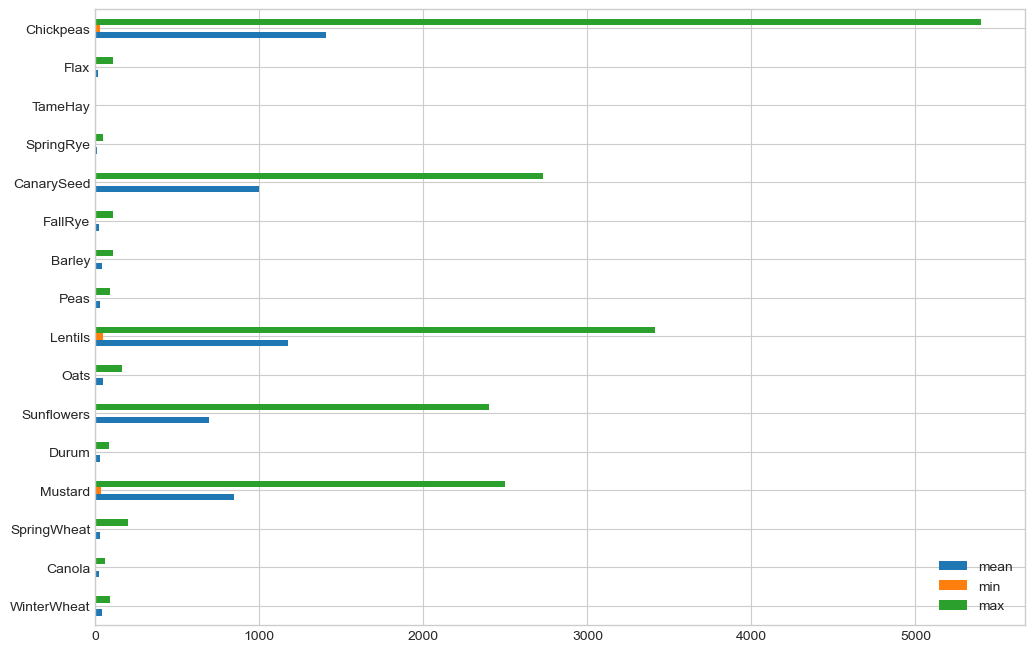

In [78]:
df[cols_crop].describe().T[['mean', 'min', 'max']].plot(kind='barh')

<AxesSubplot:>

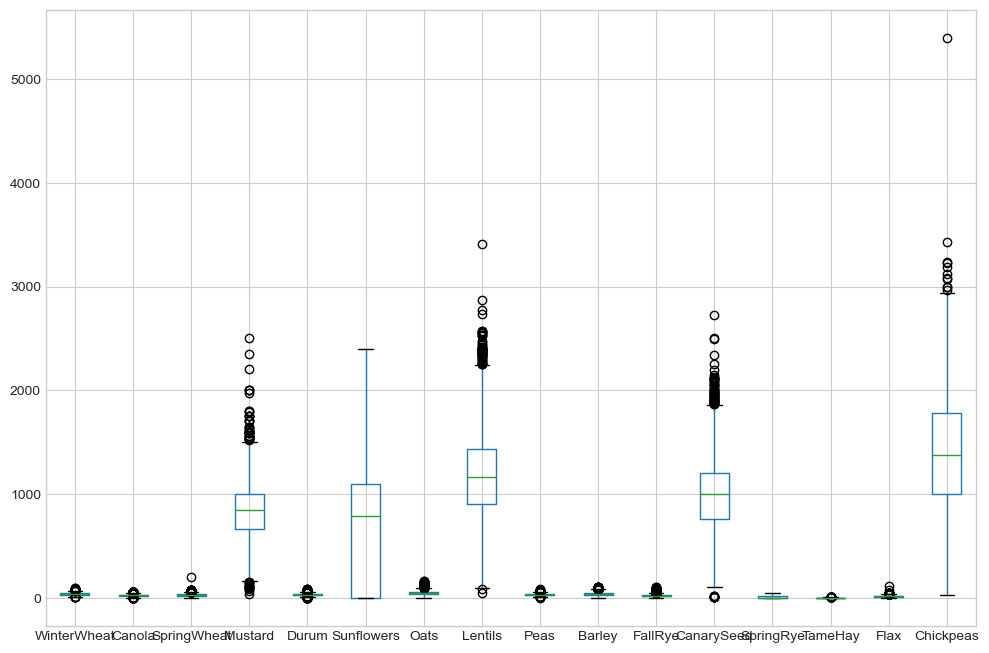

In [83]:
df[cols_crop].boxplot()

<AxesSubplot:>

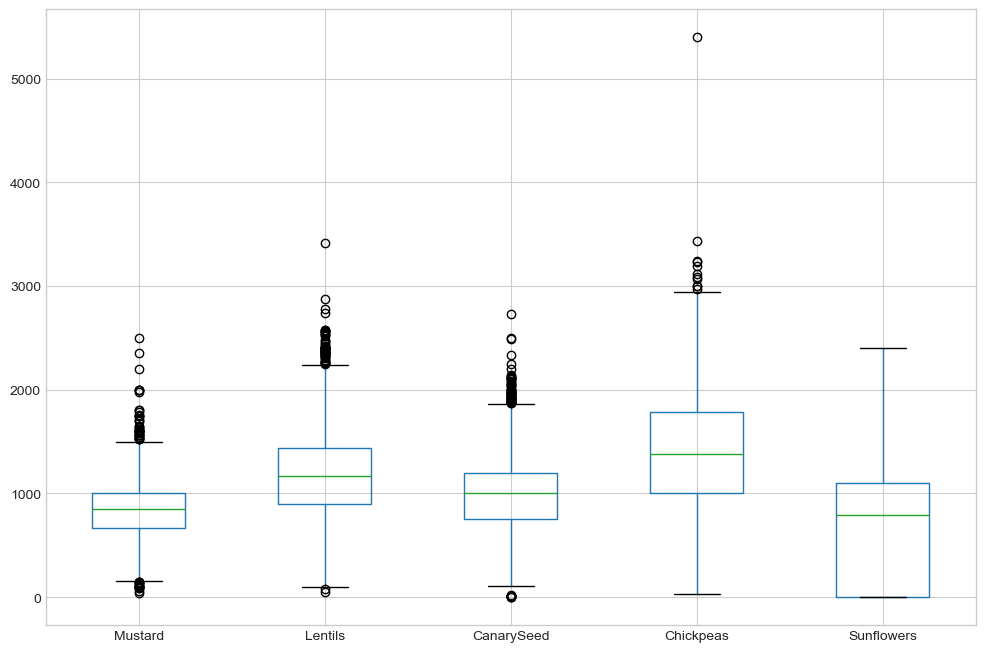

In [89]:
df[['Mustard', 'Lentils', 'CanarySeed', 'Chickpeas','Sunflowers']].boxplot()

<AxesSubplot:>

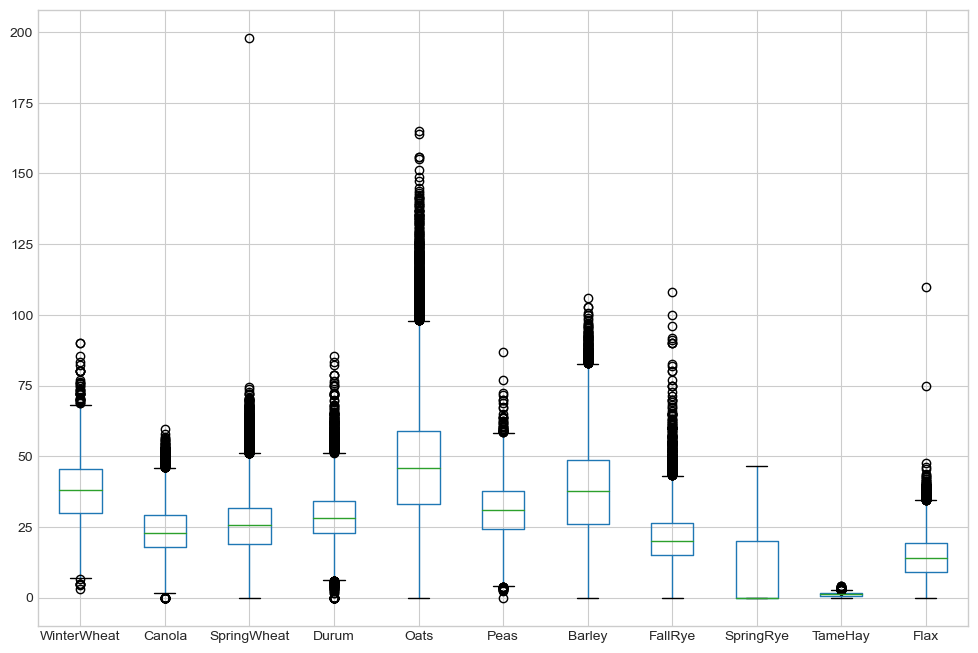

In [90]:
df[['WinterWheat',
 'Canola',
 'SpringWheat',
 'Durum',
 'Oats',
 'Peas',
 'Barley',
 'FallRye',
 'SpringRye',
 'TameHay',
 'Flax']].boxplot()

<AxesSubplot:xlabel='Canola', ylabel='Lentils'>

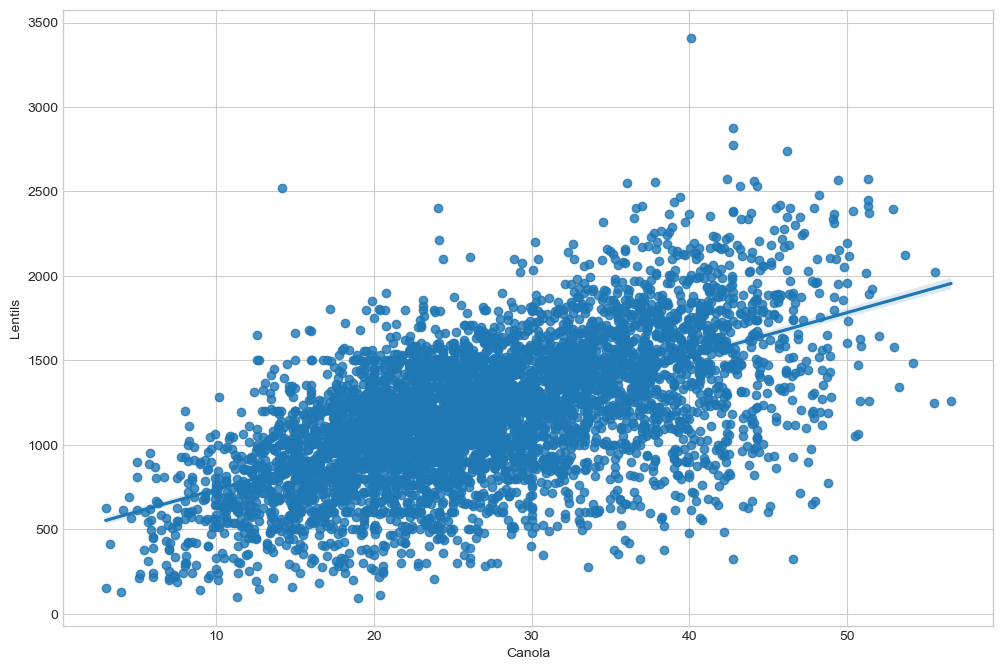

In [102]:
sb.regplot(x=df['Canola'], y=df['Lentils'])

In [100]:
df

,Year,RM,WinterWheat,Canola,SpringWheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,FallRye,CanarySeed,SpringRye,TameHay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.00,NaN,NaN,NaN,1.00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.00,NaN,NaN,NaN,16.00,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.00,NaN,NaN,NaN,23.00,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.00,NaN,NaN,NaN,32.00,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.00,NaN,NaN,NaN,35.00,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25012,2017,622,NaN,43.06,59.49,NaN,NaN,NaN,93.01,NaN,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25013,2018,622,NaN,39.30,59.50,NaN,NaN,NaN,96.40,NaN,43.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
25014,2019,622,NaN,46.10,63.90,NaN,NaN,NaN,106.00,NaN,33.7,73.9,NaN,NaN,NaN,NaN,NaN,NaN
25015,2020,622,NaN,40.90,55.10,NaN,NaN,NaN,94.50,NaN,49.2,74.3,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.groupby('RM')\
    .mean()\
    .reset_index()\
    .isna()\
    .sum()

RM               0
Year             0
WinterWheat     17
Canola           0
SpringWheat      0
Mustard         25
Durum            4
Sunflowers       4
Oats             0
Lentils         14
Peas             2
Barley           0
FallRye          0
CanarySeed      10
SpringRye        2
TameHay          0
Flax             0
Chickpeas      171
dtype: int64

In [113]:
df_mean=df.groupby('RM')\
    .mean()

In [ ]:
df.groupby('RM').agg([''])

In [111]:
df_mean

,RM,Year,WinterWheat,Canola,SpringWheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,FallRye,CanarySeed,SpringRye,TameHay,Flax,Chickpeas
0,1,1979.500000,42.945217,21.947115,24.154096,758.895000,23.922286,1170.557895,45.644881,902.666667,32.500000,37.405301,27.195789,964.000000,0.000000,1.268571,12.383625,NaN
1,2,1979.500000,38.262500,23.679808,25.680120,814.634211,29.577333,1092.417647,46.792262,1107.429167,32.358621,37.755357,25.177432,972.158333,0.000000,1.328571,13.546098,NaN
2,3,1979.500000,43.066522,22.665962,25.430357,675.832143,30.494808,620.125000,45.807976,1009.404138,29.053333,39.307619,24.222436,1169.736190,6.666667,1.142667,13.026548,969.933333
3,4,1979.500000,37.411818,21.255208,22.984643,790.321111,27.032885,847.285714,40.397407,1251.575385,28.025926,32.747500,20.276349,933.662000,0.000000,1.228667,12.245181,NaN
4,5,1979.500000,33.166923,20.949767,21.416905,808.064000,27.102885,1035.714286,37.884000,1202.783500,30.044000,33.670988,17.413115,714.674444,0.000000,0.914000,11.493253,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,529,1964.500000,NaN,18.694737,17.615094,NaN,NaN,NaN,33.386792,NaN,NaN,26.675510,17.272727,NaN,NaN,1.405000,7.000000,NaN
295,555,1979.144578,NaN,22.702791,23.986029,NaN,NaN,0.000000,49.635882,NaN,35.325000,33.863770,22.375000,NaN,0.000000,1.394167,15.777778,NaN
296,561,1979.500000,NaN,24.677200,27.799506,NaN,11.000000,0.000000,53.278308,1265.000000,30.495833,40.843284,23.357143,NaN,0.000000,1.738000,12.857143,NaN
297,588,1979.500000,39.795000,24.843455,30.260833,1250.000000,32.575000,450.000000,54.771310,1259.625000,34.582759,41.272169,23.535849,900.000000,0.000000,1.863571,13.991489,NaN


In [122]:
df['RM']=df['RM'].astype('string')

<AxesSubplot:xlabel='Year'>

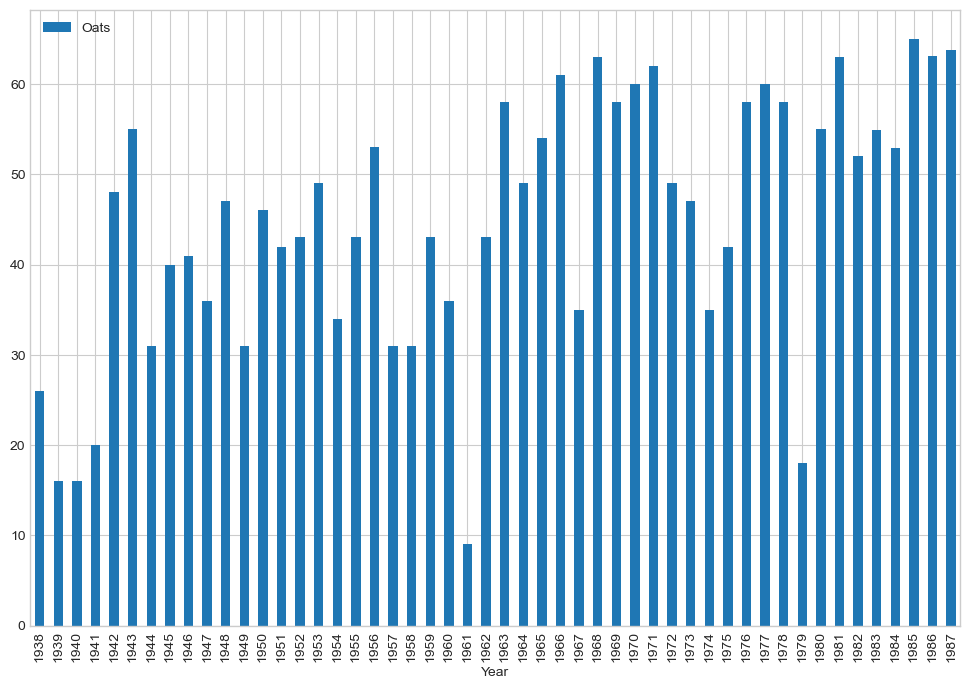

In [141]:
df.loc[df['RM']=='243'][['Year','Oats']][:50].set_index('Year').plot(kind='bar')

<AxesSubplot:>

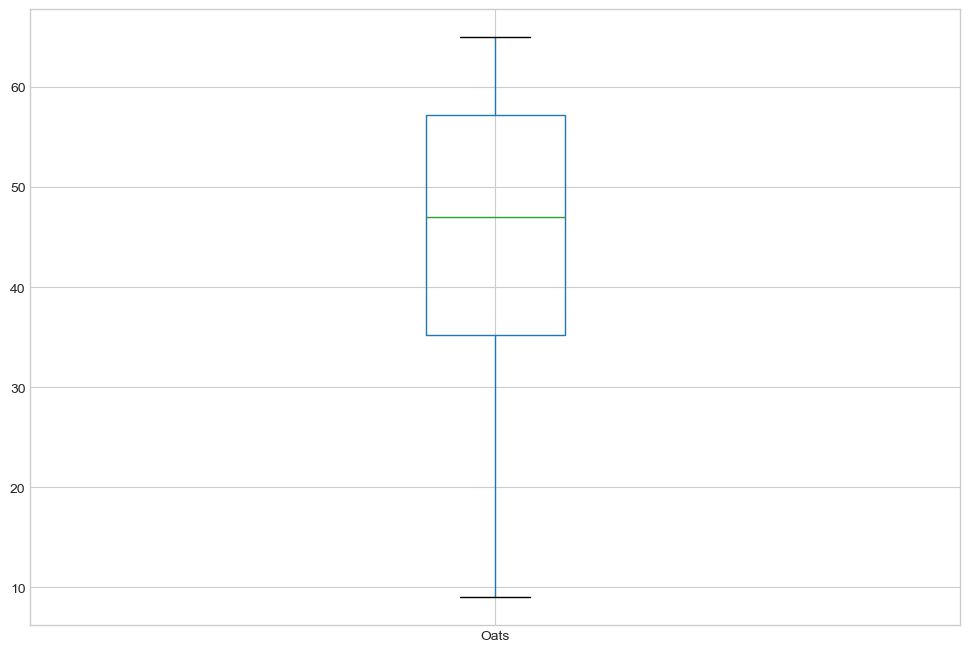

In [142]:
df.loc[df['RM']=='243'][['Year','Oats']][:50].set_index('Year').boxplot()

array([[<AxesSubplot:title={'center':'Oats'}>]], dtype=object)

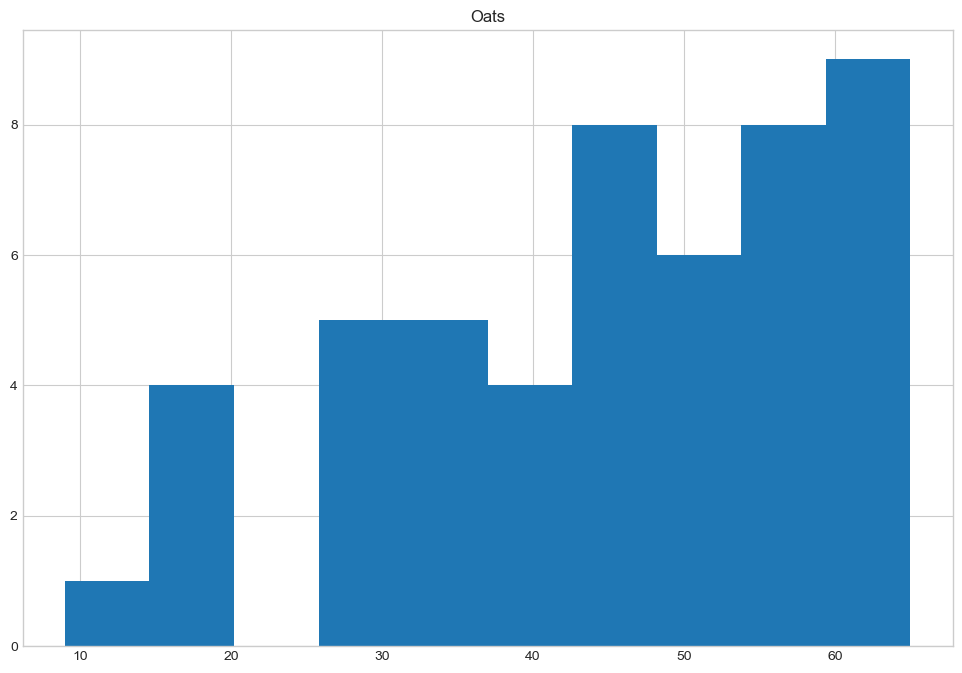

In [143]:
df.loc[df['RM']=='243'][['Year','Oats']][:50].set_index('Year').hist()